In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pickle
from mix_Network import *
from Event import Event
from Tools import LoadObject, EuclidianNorm, NormalizedNorm, BattachaNorm

# Defining the network and training

In [3]:
hots = network(algo='lagorce', krnlinit='first')
hots.learninglagorce(diginit=True)

100%|██████████| 223371/223371 [06:32<00:00, 569.74it/s] 


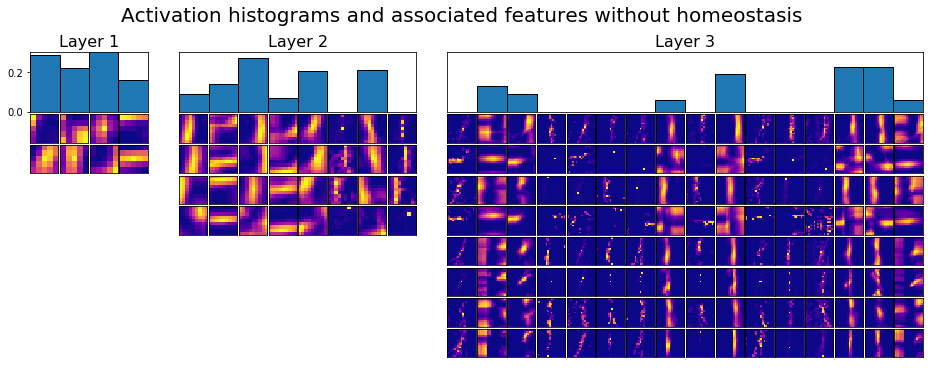

In [4]:
hots.plotlayer()

# Running the Network on training samples

In [5]:
trainmap = hots.traininglagorce()

100%|██████████| 520844/520844 [10:30<00:00, 826.03it/s] 


# Runing the Network on testing samples

In [6]:
testmap, accuracy = hots.testinglagorce(trainmap)


bhatta:97.5% - eucli:90.0% - norm:90.0%


# Classifying

In [7]:
def EuclidianNorm(hist1,hist2):
    return np.linalg.norm(hist1-hist2)

def NormalizedNorm(hist1,hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return np.linalg.norm(hist1-hist2)/(np.linalg.norm(hist1)*np.linalg.norm(hist2))

def BattachaNorm(hist1, hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return -np.log(np.sum(np.sqrt(hist1*hist2)))

def accuracy(trainmap,testmap,measure):
    accuracy=0
    total = 0
    for i in range(len(testmap)):
        dist = np.zeros([len(trainmap)])
        for k in range(len(trainmap)):
            if measure=='bhatta':
                dist[k] = BattachaNorm(testmap[i][1],trainmap[k][1])
            elif measure=='eucli':
                dist[k] = EuclidianNorm(testmap[i][1],trainmap[k][1])
            elif measure=='norm':
                dist[k] = NormalizedNorm(testmap[i][1],trainmap[k][1])
        if testmap[i][0]==trainmap[np.argmin(dist)][0]:
            accuracy+=1
        total+=1
    return accuracy/total

In [8]:
score1=accuracy(trainmap,testmap,'bhatta')
score2=accuracy(trainmap,testmap,'eucli')
score3=accuracy(trainmap,testmap,'norm')
print('bhatta:'+str(score1*100)+'% - '+'eucli:'+str(score2*100)+'% - '+'norm:'+str(score3*100)+'%')

bhatta:97.5% - eucli:90.0% - norm:90.0%


In [9]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
with open(fname, 'wb') as file:
    pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)